## Statistics for DAGs $ A \rightarrow B \rightarrow C \rightarrow D \rightarrow E $ with all possible confounder edges / version 0.6

### Imports

In [1]:
import json
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import Counter
import random

import warnings
warnings.filterwarnings("ignore")

### import data / output of DAGitty on ABCDE DAGs

In [2]:
with open('data_out', 'r') as f:
  data = json.load(f)

with open('dags_out', 'r') as f:
  dags = json.load(f)

with open('monoton_dags', 'r') as f:
  monoton_dags = json.load(f)
  
with open('monoton_data', 'r') as f:
  monoton_data = json.load(f)

### counting the number of times edge $ i \in \{ A, B, C, D, E \} $ is being identified

Number of DAGs studied: 1024

Number of times edge i was identified: 

A: sum_num_A_idfied = 0
B: sum_num_B_idfied = 684
C: sum_num_C_idfied = 820
D: sum_num_D_idfied = 864
E: sum_num_E_idfied = 880


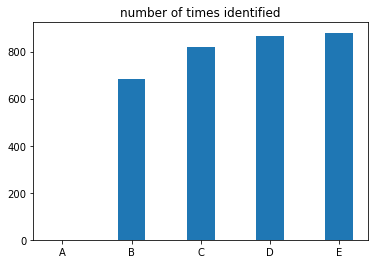

In [3]:
print(f'Number of DAGs studied: {len(dags)}\n')

print('Number of times edge i was identified: \n')
####### AAAAAAAAAAAAAA
num_A_identified = np.zeros(len(data))
for i, date in enumerate(data): 
    num_A_identified[i] = date.count('"A":')

sum_num_A_idfied = int(np.sum(num_A_identified))
print(f'A: {sum_num_A_idfied = }')
#######

####### BBBBBBBBBBBBBB
num_B_identified = np.zeros(len(data))
for i, date in enumerate(data): 
    num_B_identified[i] = date.count('"B":')

sum_num_B_idfied = int(np.sum(num_B_identified))
print(f'B: {sum_num_B_idfied = }')
######

###### CCCCCCCCCCCCCCC
num_C_identified = np.zeros(len(data))
for i, date in enumerate(data): 
    num_C_identified[i] = date.count('"C":')

sum_num_C_idfied = int(np.sum(num_C_identified))
print(f'C: {sum_num_C_idfied = }')
######

###### DDDDDDDDDDDDDDD
num_D_identified = np.zeros(len(data))
for i, date in enumerate(data): 
    num_D_identified[i] = date.count('"D":')
    
sum_num_D_idfied = int(np.sum(num_D_identified))
print(f'D: {sum_num_D_idfied = }')

######

###### EEEEEEEEEEEEEEE
num_E_identified = np.zeros(len(data))
for i, date in enumerate(data): 
    num_E_identified[i] = date.count('"E":')

sum_num_E_idfied = int(np.sum(num_E_identified))
print(f'E: {sum_num_E_idfied = }')

######

figx1 = plt.figure()
axx1 = figx1.add_subplot()
# number of times edge X was identified: 
axx1.bar([1, 2, 3, 4, 5], [sum_num_A_idfied, sum_num_B_idfied, sum_num_C_idfied, sum_num_D_idfied, sum_num_E_idfied], width=0.4)
axx1.set_xticklabels(['', 'A', 'B', 'C', 'D', 'E'])
axx1.set_title('number of times identified')
# plt.savefig('DAGitty_Statisti_X_1_Edge_NumIdentified.svg')
plt.show()

### how many times i edges were identified, (i $ \in \{0, 1, 3, 4 \} $)

There are 551 DAGs in which 4 edges could be identified. 
There are 246 DAGs in which 3 edges could be identified. 
There are 118 DAGs in which 2 edges could be identified. 
There are 70 DAGs in which 1 edge could be identified. 
There are 39 DAGs in which 0 edges could be identified. 


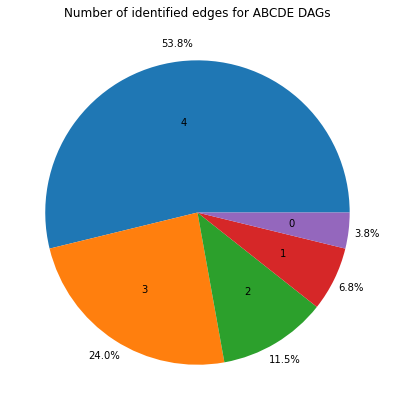

In [4]:
num_identified = num_A_identified + num_B_identified + num_C_identified + num_D_identified + num_E_identified
# print(f'{len(num_identified), max(num_identified) = }')

## 4 edges: 
boole_four = np.isin(num_identified, 4)
print(f'There are {np.sum(boole_four)} DAGs in which 4 edges could be identified. ')
percentage_4 = np.sum(boole_four)/len(data)
# print(f'In {percentage_4} % of the graphs four edges where identified.')

## 3 edges: 
boole_three = np.isin(num_identified, 3)
percentage_3 = np.sum(boole_three)/len(data)
print(f'There are {np.sum(boole_three)} DAGs in which 3 edges could be identified. ')

## two edges: 
boole_two = np.isin(num_identified, 2)
percentage_2 = np.sum(boole_two)/len(data)
print(f'There are {np.sum(boole_two)} DAGs in which 2 edges could be identified. ')

## one edge: 
boole_one = np.isin(num_identified, 1)
percentage_1 = np.sum(boole_one)/len(data)
print(f'There are {np.sum(boole_one)} DAGs in which 1 edge could be identified. ')

# print(f'{(np.sum(boole_one) + np.sum(boole_two) + np.sum(boole_three))/len(data) = }')
boole_some = np.isin(num_identified, [1, 2, 3])
# print(f'{np.sum(boole_some) = }')
# print(f'In {np.sum(boole_some)/len(data)} % of the graphs some but not all (four) edges where identified.')

## no edge: 
boole_none = np.isin(num_identified, 0)
percentage_0 = np.sum(boole_none)/len(data)
print(f'There are {np.sum(boole_none)} DAGs in which 0 edges could be identified. ')
# print(f'{np.sum(boole_none) = }')
# print(f'In {np.sum(boole_none)/len(data)} % of the graphs none of the edges where identified.')
# check percentages: 
# print(f'check percentage: {(np.sum(boole_none) + np.sum(boole_some) + np.sum(boole_four))/len(data) = }')


figx2 = plt.figure(figsize=(7,7))
axx2 = figx2.add_subplot()
# how many edges were identified how often: 
labels = '4', '3', '2', '1', '0'
sizes = [percentage_4*100, percentage_3*100, percentage_2*100, percentage_1*100, percentage_0*100]
axx2.pie(sizes, labels=labels, autopct='%1.1f%%',
       pctdistance=1.12, labeldistance=.6)
axx2.set_title('Number of identified edges for ABCDE DAGs')
# plt.savefig('DAGitty_Statisti_X_1_HowOftenIdentified.svg')
plt.show()

### which methods were used to identify these edges? 

Each DAG uses "missingCycles" maximal 1 times.


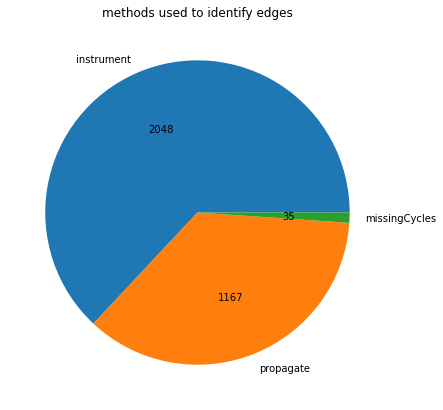

In [5]:
####### instrument
num_instrument = np.zeros(len(data))
for i, date in enumerate(data): 
    num_instrument[i] = date.count('"instrument"')
sum_num_instrument =  np.sum(num_instrument)
####### instrument 

####### propagate
num_propagate = np.zeros(len(data))
for i, date in enumerate(data): 
    num_propagate[i] = date.count('"propagate"')
sum_num_propagate =  np.sum(num_propagate)
####### propagate 

####### missingCycles
num_miscycles = np.zeros(len(data))
for i, date in enumerate(data): 
    num_miscycles[i] = date.count("missingCycles")

# print(f'{np.sum([num_miscycles>1]) = }')
print(f'Each DAG uses "missingCycles" maximal {int(np.max(num_miscycles))} times.')
sum_num_missingCycles =  np.sum(num_miscycles)
# print(f'{sum_num_missingCycles = }')
####### missingCycles


# which methods where used when identifying: 
sum_all_methods = sum_num_instrument + sum_num_propagate + sum_num_missingCycles
# print(f'{sum_all_methods = }')

figx3 = plt.figure(figsize=(7, 7))
axx3 = figx3.add_subplot()

labels = 'instrument', 'propagate', 'missingCycles'
sizes = [sum_num_instrument, sum_num_propagate, sum_num_missingCycles]
axx3.pie(sizes, labels=labels, autopct= lambda x: round(x*sum_all_methods/100))
axx3.set_title('methods used to identify edges')
# plt.savefig('DAGitty_Statisti_X_1_Which_Methods.svg')
plt.show()

### DAGs, which use missingCycles to identify edges, and for which $ \exists A \leftrightarrow i $, $ i \in \{ B, C, D, E \} $, which is NOT part of the DAG: 



DAGs missing at least one confounder A<->i for i in {B, C, D, E} and use "missingCycles" to identify edges: 
(These are 10 DAGs from the total of 1024 DAGs and from the 35 DAGs that use "missingCycles".)

['dag { A->B->C->D->E A<->D A<->C A<->B }'
 'dag { A->B->C->D->E B<->E B<->D B<->C A<->E A<->D A<->C }'
 'dag { A->B->C->D->E C<->E C<->D A<->E A<->D A<->B }'
 'dag { A->B->C->D->E C<->E C<->D B<->C A<->E A<->D A<->B }'
 'dag { A->B->C->D->E D<->E A<->D A<->C A<->B }'
 'dag { A->B->C->D->E D<->E A<->E A<->C A<->B }'
 'dag { A->B->C->D->E D<->E C<->D A<->E A<->C A<->B }'
 'dag { A->B->C->D->E D<->E C<->D B<->D A<->E A<->C A<->B }'
 'dag { A->B->C->D->E D<->E C<->E A<->D A<->C A<->B }'
 'dag { A->B->C->D->E D<->E C<->E B<->E A<->D A<->C A<->B }']


xample = 6
For example:
 data[indx[xample]] = '{"results":{"B":[{"fastp":[[[[-1,2,1,8,1,12,1],[1,2,1,9,1,11,1],[-1,4,1,6,1,12,1],[1,4,1,7,1,9,1],[1,5,1,6,1,11,1],[-1,5,1,7,1,8,1]],[[-1]],[[-2,2,1,4,1,12,1],[2,2,1,5,1,11,1],[2,3,1,4,1,9,1],[

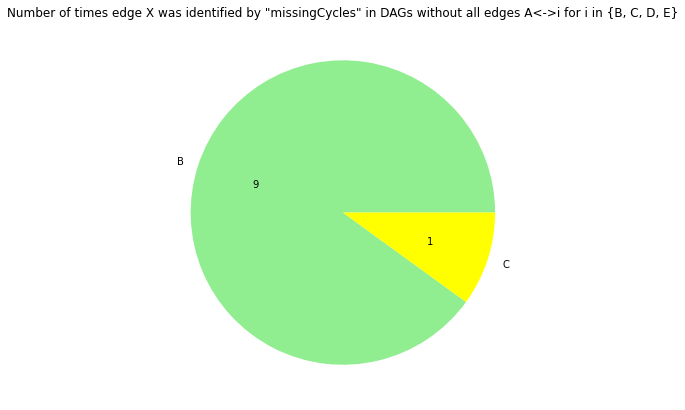

In [6]:
# wie sehen die Graphen aus, die missingCycles verwendet haben? :

cycles_used_idcs = np.nonzero(num_miscycles)[0]
# print(f'{len(cycles_used_idcs), cycles_used_idcs = }')


dags_w_mcycles = np.array(dags)[cycles_used_idcs]
# print(f'{len(dags_w_mcycles), len(cycles_used_idcs), dags_w_mcycles = }')

indx = []
for i, dag in enumerate(dags_w_mcycles):
    dagsplt = dag.split(' ')
    if not all([ x in dagsplt for x in ['A<->E', 'A<->D', 'A<->C', 'A<->B']]): 
         indx.append(cycles_used_idcs[i])
         
# print(f'{indx = }')
boole_not_all_Aconf_misscycles = np.zeros(len(dags))
boole_not_all_Aconf_misscycles[indx] = 1

# # test: 
# print(f'{np.all(np.where(boole_not_all_Aconf_misscycles)[0] == indx) = }')
# print(f'{len(boole_not_all_Aconf_misscycles), np.sum(boole_not_all_Aconf_misscycles), boole_not_all_Aconf_misscycles = }')

print('\n\nDAGs missing at least one confounder A<->i for i in {B, C, D, E} and use "missingCycles" to identify edges: ')

# how often missingCycles were used: 
boole_dags_w_mcycle = [num_miscycles > 0]
# print(f'{boole_dags_w_mcycle = }')


print(f'(These are {len(indx)} DAGs from the total of {len(dags)} DAGs and from the {np.sum(boole_dags_w_mcycle)} DAGs that use "missingCycles".)\n')
print(np.array(dags)[indx])
print('\n')
dags_notfully_wMissingCycles = np.array(dags)[indx]

xample = np.random.randint(0, len(indx))
print(f'{xample = }')
print(f'For example:\n {data[indx[xample]] = }\n') 

print('\nFurther investigations: \n')
# check whether for these DAGs 3 of the edges A<->i for i in {B, C, D, E} are present and which edge was identified by "missingCycles": 
indxx_and_numai_edges = []
confounders = ['A<->E', 'A<->D', 'A<->C', 'A<->B']
for i, dag in enumerate(dags_w_mcycles):
    dagsplt = dag.split(' ')
    edges_existence_boolean_vec = [ x in dagsplt for x in confounders]
    if not all(edges_existence_boolean_vec): 
        # print(f'{monoton_data[cycles_used_idcs[i]][0] = }')
        id_edges = []
        # mul = [ x for (x, b) in zip(confounders, blean) if b]
        conf_edges = [ x for (x, b) in zip(confounders, edges_existence_boolean_vec) if b]
        for edge in ['A', 'B', 'C', 'D', 'E']: 
            jrex = False
            jloadrex = json.loads(monoton_data[cycles_used_idcs[i]][0])
            if edge in jloadrex['results']: 
                jedgerex = jloadrex['results'][f'{edge}']
                if 'missingCycles' in jedgerex[0]: 
                    jrex = jedgerex[0]['missingCycles']
            if jrex: 
                id_edges.append(edge)
          
        indxx_and_numai_edges.append([cycles_used_idcs[i], np.sum(edges_existence_boolean_vec), conf_edges, id_edges])

print(f'{len(indxx_and_numai_edges), indxx_and_numai_edges = }')
print(f'\nWe can see above that all of these DAGs have exactly 3 of the edges A<->i for i in {{B, C, D, E}}. ')
print('Notice further that one time the edge "C" was identified, while all the other times the edge "B" was identified with "missingCycles".') 
print('Also notice that for each edge X identified with "missingCycles" the confounder edge A<->X was part of the DAG. ')


figy3 = plt.figure(figsize=(7, 7))
ax1= figy3.add_subplot()

labels = 'B', 'C'
sizes = [9, 1]

ax1.pie(sizes, labels=labels, colors=[ 'lightgreen', 'yellow'], autopct= lambda x: round(x*np.sum(10)/100))
ax1.set_title('Number of times edge X was identified by "missingCycles" in DAGs without all edges A<->i for i in {B, C, D, E}')
plt.show()


## MONOTONIE 

In [7]:

monon_boolean = np.zeros(len(data))
monon_boolean = np.array(monon_boolean, dtype=bool)

# nodes_diff_all records for all subdags of a DAG in monoton_data/monoton_dags the difference of the identified edges: 
# (this is used later to determine which deletion of edges leads to non-monotonicity of the DAG (later in the case of a DAG for which all 4 edges were identified))
nodes_diff_all = []

for i, mon_date in enumerate(monoton_data): 
    ident_nodes = np.zeros(5)
    ident_base = np.zeros(5)
    ident_base[0] = mon_date[0].count('"A":')
    ident_base[1] = mon_date[0].count('"B":')
    ident_base[2] = mon_date[0].count('"C":')
    ident_base[3] = mon_date[0].count('"D":')
    ident_base[4] = mon_date[0].count('"E":')
    check_list = []
    nodes_diff_leafs = []
    for date in mon_date[1:]: 
        ident_nodes[0] = date.count('"A":')
        ident_nodes[1] = date.count('"B":')
        ident_nodes[2] = date.count('"C":')
        ident_nodes[3] = date.count('"D":')
        ident_nodes[4] = date.count('"E":')
        nodes_diff_leafs.append(np.subtract(ident_nodes, ident_base))
        if np.all(np.subtract(ident_nodes, ident_base)!=-1): check_list.append(1)
        else: check_list.append(0)
    
    nodes_diff_all.append(nodes_diff_leafs)
    if np.all(np.array(check_list) == 1): monon_boolean[i]=True

# print(f'{monon_boolean = }')
# print(f'{np.sum(monon_boolean) = }\n')
print(f'There are {np.sum(monon_boolean, dtype=int)} monoton DAGs from the {len(data)} DAGs in total. \n')


## check: 
xample_vec = np.where(monon_boolean==True)[0]
# print(xample_vec)
xample = np.random.choice(xample_vec)

print('Example monoton DAG: ')
print(f'({xample = })\n')
print(f'{dags[xample]}\n')
print(f'...with results: \n{monoton_data[xample] = }\n')


# test: 
# print(f'{len(monoton_data), len(nodes_diff_all), nodes_diff_all = }')


There are 788 monoton DAGs from the 1024 DAGs in total. 

Example monoton DAG: 
(xample = 892)

dag { A->B->C->D->E D<->E C<->E B<->E B<->D B<->C A<->E A<->D }

...with results: 
monoton_data[xample] = ['{"results":{"B":[{"fastp":[[[[1,2,1]],null,[[1,1,1]],null,null]],"instrument":"A"}],"C":[{"fastp":[[[[1,3,1]],null,[[1,2,1]],null,null]],"instrument":"A"}],"D":[{"fastp":[[[[-1,2,1,11,1],[1,3,1,8,1]],null,[[-1,2,1,10,1],[1,3,1,7,1]],null,null]],"propagate":"C","propagatePath":["C"],"propagatedMissingCycles":[],"oldMissingCycles":[]}]}}', '{"results":{"B":[{"fastp":[[[[1,2,1]],null,[[1,1,1]],null,null]],"instrument":"A"}],"C":[{"fastp":[[[[1,3,1]],null,[[1,2,1]],null,null]],"instrument":"A"}],"D":[{"fastp":[[[[1,4,1]],null,[[1,3,1]],null,null]],"instrument":"A"}]}}', '{"results":{"B":[{"fastp":[[[[1,2,1]],null,[[1,1,1]],null,null]],"instrument":"A"}],"C":[{"fastp":[[[[1,3,1]],null,[[1,2,1]],null,null]],"instrument":"A"}],"D":[{"fastp":[[[[-1,2,1,11,1],[1,3,1,8,1]],null,[[-1,2,1,10,1],[1

### DAGs that use missingCycles to identify edges... (Monotonie)

Are all the DAGs, that use "missingCycles" to identify edges, monoton? False
How many of the "missingCycles" DAGs are monoton? np.sum(boole_monoton_and_miscycles) = 12
Therefor 23 of them are not monoton. 

Are the monoton DAGs that use "missingCycles" and have 4 identifiable edges the same as the DAGs that do not have all       
confounder edges A<->i for i in {B, C, D, E} and use "missingCycles"? False
But the amount of both is the same? True
How many of them are the same? 3.0


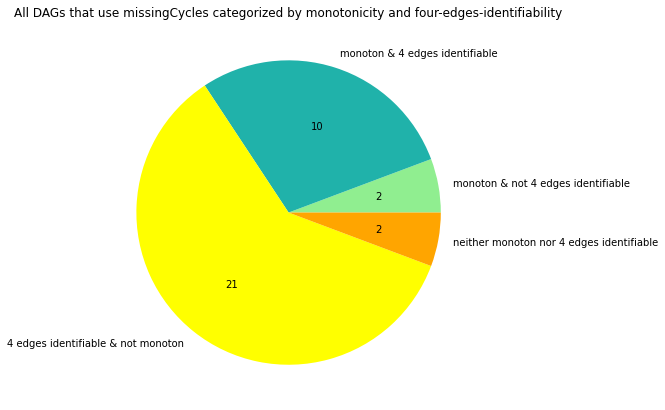

In [8]:
miscycles_idx = np.asarray(num_miscycles!=0).nonzero()[0]
# print(f'{miscycles_idx = }')

boole_miscycles = np.where(num_miscycles!=0, 1, 0)
# print(f'{len(boole_miscycles), np.sum(boole_miscycles) = }')

# # test: 
# print(f'{np.all(miscycles_idx == np.where(boole_miscycles==1)[0]) = }')

boole_monoton_and_miscycles = boole_miscycles * monon_boolean
# print(f'{np.sum(boole_monoton_and_miscycles) = }')
boole_not_monoton_and_miscycles = (np.ones_like(boole_monoton_and_miscycles) - boole_monoton_and_miscycles) * boole_miscycles
print(f'Are all the DAGs, that use "missingCycles" to identify edges, monoton? {np.sum(boole_monoton_and_miscycles) == np.sum(boole_miscycles) }')
print(f'How many of the "missingCycles" DAGs are monoton? {np.sum(boole_monoton_and_miscycles) = }')
not_boole_monoton_and_miscycles = (np.ones_like(boole_monoton_and_miscycles) - boole_monoton_and_miscycles) * boole_miscycles
print(f'Therefor {np.sum(not_boole_monoton_and_miscycles)} of them are not monoton. ')

boole_four_idfble_and_misscycle = boole_four * boole_miscycles
# print(f'{len(boole_four_idfble_and_misscycle), sum(boole_four_idfble_and_misscycle), boole_four_idfble_and_misscycle = }')

boole_four_idfble_and_monoton_misscycle = boole_monoton_and_miscycles * boole_four_idfble_and_misscycle

print(f'\nAre the monoton DAGs that use "missingCycles" and have 4 identifiable edges the same as the DAGs that do not have all \
      \nconfounder edges A<->i for i in {{B, C, D, E}} and use "missingCycles"? { np.all(boole_four_idfble_and_monoton_misscycle == boole_not_all_Aconf_misscycles )}')
print(f'But the amount of both is the same? {np.sum(boole_four_idfble_and_monoton_misscycle) == np.sum(boole_not_all_Aconf_misscycles) }')
print(f'How many of them are the same? {np.sum(boole_not_all_Aconf_misscycles * boole_four_idfble_and_monoton_misscycle) }')

boole_not_four_idfble_and_misscycle = (np.ones_like(boole_four_idfble_and_misscycle) - boole_four_idfble_and_misscycle) * boole_miscycles
boole_only_monoton_miscycle = boole_monoton_and_miscycles * boole_not_four_idfble_and_misscycle
boole_only_four_idfble_and_miscycle = boole_four_idfble_and_misscycle * boole_not_monoton_and_miscycles
boole_not_four_not_mono_and_miscycle = boole_not_four_idfble_and_misscycle * boole_not_monoton_and_miscycles
# print(f'{np.sum(boole_not_four_not_mono_and_miscycle) = }')

figy1 = plt.figure(figsize=(7, 7))
ax1= figy1.add_subplot()

labels = 'monoton & not 4 edges identifiable', 'monoton & 4 edges identifiable', '4 edges identifiable & not monoton', 'neither monoton nor 4 edges identifiable'
sizes = [np.sum(boole_only_monoton_miscycle), np.sum(boole_four_idfble_and_monoton_misscycle), np.sum(boole_only_four_idfble_and_miscycle), np.sum(boole_not_four_not_mono_and_miscycle)]
# print(f'{only_monton + monoton_and_alledges + four_edges_not_monoton + not_monon_not_fouredges = }')

ax1.pie(sizes, labels=labels, colors=[ 'lightgreen', 'lightseagreen', 'yellow', 'orange'], autopct= lambda x: round(x*np.sum(boole_miscycles)/100))
ax1.set_title('All DAGs that use missingCycles categorized by monotonicity and four-edges-identifiability')
plt.show()

### check the actual edges that were identified with missingCycles: (Monotonie)

Confounder edges, when deleted, resulted in an edge previously identified by "missingCycles" to be non-identifiable: 
len(flat_xmissing_eac), flat_xmissing_eac = (20, [[['A<->D'], 'B'], [['A<->E'], 'B'], [['A<->E'], 'C'], [['A<->E'], 'C'], [['A<->E'], 'B'], [['A<->E'], 'B'], [['A<->E'], 'B'], [['A<->D'], 'B'], [['A<->D'], 'B'], [['A<->E'], 'B'], [['A<->E'], 'B'], [['A<->D'], 'B'], [['A<->E'], 'B'], [['A<->E'], 'B'], [['A<->E'], 'B'], [['A<->E'], 'B'], [['A<->D'], 'B'], [['A<->D'], 'B'], [['A<->D'], 'B'], [['A<->D'], 'B']])

Because for each DAG with a "missingCycles"-edge this edge is non-identifiable in maximal 1 subdag(s), we can say that 20 of the edges identified by "missingCycles" are non-monoton: 

These edges are: ['B', 'B', 'C', 'C', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
Their non-monotonicity resulted from not being identifiable after deleting corresponding* confounder edges : 
[['A<->D'], ['A<->E'], ['A<->E'], ['A<->E'], ['A<->E'], ['

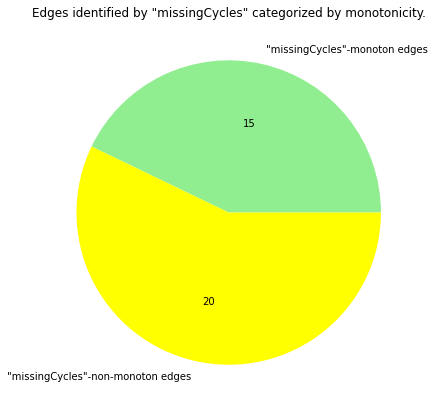

In [9]:
edges_list = ['A', 'B', 'C', 'D', 'E']
# just check for DAGs that use missingCycles: 
xmissing_edges_and_conseq = []
subdag_count_lst = [] # for checking how many of the non-identifiable edges are actually 'just' from different subdags of one DAG (or even the same subdag (but we ḱnow that is not possible, because each DAG has maximal one edge identified by "missingCycles")) 
indcs_nonmon_miscycles = []
for i in miscycles_idx:  # loop through all DAG indices that have a "missingCycles"-edge
    DAG = monoton_dags[i][0]
    DAGsplt = DAG.split(' ')
    xmissing_edges_and_conseq_local = []
    subdag_count = 0
    indcs_nonmon_local = []
    for j in range(len(nodes_diff_all[i])):  # loop through all subdags of dag
        subdag = monoton_dags[i][j+1]
        subdagsplt = subdag.split(' ')
        difference = [ x for x in DAGsplt if x not in subdagsplt]
        xmissing_edges_and_conseq_local_local = []
        for k in range(len(nodes_diff_all[i][j])):  # loop through the differences between all identified edges (A, B, C, D, E)
            if nodes_diff_all[i][j][k] == -1.0:  # if there is a difference, i.e. if edge is non-monoton
                ######
                jrex = False
                jloadrex = json.loads(monoton_data[i][0])
                if edges_list[k] in jloadrex['results']: 
                    jedgerex = jloadrex['results'][f'{edges_list[k]}']
                    if 'missingCycles' in jedgerex[0]: 
                        jrex = jedgerex[0]['missingCycles']

                ######
                
                if jrex:  # if non-monoton edge is "missingCycles"-edge
                    xmissing_edges_and_conseq_local_local.append([difference, edges_list[k]])  # append the deleted confounder of subdag and the non-monoton "missingCycles"-edge
                    indcs_nonmon_local.append([i,j+1])  # record indices
                    subdag_count += 1  # is actually sum over non-monoton "missingCycles"-edges per DAG
        xmissing_edges_and_conseq_local.append(xmissing_edges_and_conseq_local_local)
    indcs_nonmon_miscycles.append(indcs_nonmon_local)
    subdag_count_lst.append(subdag_count)    
    xmissing_edges_and_conseq.append(xmissing_edges_and_conseq_local)
    

# print(f'{subdag_count_lst = }')
# print(f'{len(xmissing_edges_and_conseq), xmissing_edges_and_conseq = }')
print('Confounder edges, when deleted, resulted in an edge previously identified by "missingCycles" to be non-identifiable: ')
flat_xmissing_eac = [ x for lst in xmissing_edges_and_conseq for sublst in lst for x in sublst]
print(f'{len(flat_xmissing_eac), flat_xmissing_eac = }\n')

print(f'Because for each DAG with a "missingCycles"-edge this edge is non-identifiable in maximal {np.max(subdag_count_lst)} subdag(s), \
we can say that {len(flat_xmissing_eac)} of the edges identified by "missingCycles" are non-monoton: \n') 
# <-- remember that the subdag_count not only counts the number of subdags that have a non-monoton "missingCycles"-edge, but...
# ...is counting/adding (theoretically/in the code) also the number of different non-monoton "missingCycles"- edges. 

print(f'These edges are: {[ x[1] for x in flat_xmissing_eac ]}')
print(f'Their non-monotonicity resulted from not being identifiable after deleting corresponding* confounder edges : \n{[ x[0] for x in flat_xmissing_eac ]}')
print('...from corresponding* DAGs: ')
flat_indcs_nonmon_miscycles = [ x for sublst in indcs_nonmon_miscycles for x in sublst]
# print(f'{len(flat_indcs_nonmon_miscycles), flat_indcs_nonmon_miscycles = }')
dags_indcs_nonmon_miscycles = [ x[0] for x in flat_indcs_nonmon_miscycles ]
dags_nonmon_miscycles = [ monoton_dags[x][0] for x in dags_indcs_nonmon_miscycles ]
print(f'{ dags_nonmon_miscycles }')
# print(f'{len(dags_nonmon_miscycles), dags_nonmon_miscycles = }')

print('\n*(the above 3 lists are linked by index, i.e. same index i in all 3 lists means that, non-monoton "missingCycles"-edge i resulted from deleting confounder edge i in DAG i)\n')


print('\n')
# Example: 
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Example: \n')
sample = random.choice(flat_indcs_nonmon_miscycles)

print(f'{sample = }')

print('Example DAG that has non-monoton "missingCycle"-edge: ')
print(f'DAG: {monoton_dags[sample[0]][0] = }')
print(f'with DAGitty result: {monoton_data[sample[0]][0] = }\n')

print(f'with subdag: ({monoton_dags[sample[0]][sample[1]] = })')
print(f'and DAGitty result for subdag: {monoton_data[sample[0]][sample[1]] = } \n')

print(f'{nodes_diff_all[sample[0]] = }')

print('--------------------------------------------------------------------------------------------------------------------------------------------------------------')
# :end Example


# print(f'{len(subdag_count_lst), np.sum(subdag_count_lst), subdag_count_lst = }')
print(f'''\nAnd because each DAG has maximal one edge that is identified by "missingCycles" ({int(np.max(num_miscycles)) == 1 = }, see above)
and deleting only one specific confounder edge resulted in the non-identifiability of the "missingCycles"-edge ({np.max(subdag_count) == 1 = }) 
we know that all non-monoton edges are from different DAGs. Therefor we can also say the following: ''')

print(f"\n{len(flat_xmissing_eac)} of the DAGs that use 'missingCycles' are non-monoton because** of a non-identifiable edge that was identified before by method 'missingCycle'.")
print('**(but might not be the only reason / there could be ofcourse another non-identifiable edge, that was identifiable before)\n')
print(f'Therefor only {np.sum(not_boole_monoton_and_miscycles) - len(flat_xmissing_eac)} of the DAGs that use "missingCycles" and are non-monoton, have an edge that was identified by "missingCycles" that is monoton.')
print(f'In total {np.sum(boole_miscycles) - len(flat_xmissing_eac)} of the DAGs that use "missingCycles" have an "missingCycles"-monoton edge.')

# plot: 

figy2 = plt.figure(figsize=(7, 7))
ax1= figy2.add_subplot()

labels = '"missingCycles"-monoton edges', '"missingCycles"-non-monoton edges'
sizes = [np.sum(boole_miscycles) - len(flat_xmissing_eac), len(flat_xmissing_eac)]

ax1.pie(sizes, labels=labels, colors=[ 'lightgreen', 'yellow'], autopct= lambda x: round(x*np.sum(boole_miscycles)/100))
ax1.set_title('Edges identified by "missingCycles" categorized by monotonicity.')
plt.show()



(above: The difference between this chart and the one before is that here we look at non-monotonictiy of 'missingCycles'-edges, while in the first chart we look at DAGs that are not monoton (which can happen ofcourse also if another edge (instead of the 'missingCycles'-edge) is not monoton).)

### more about "missingCycles"-edges: 

In [10]:
edges_list = ['A', 'B', 'C', 'D', 'E']
# just check for DAGs that use missingCycles: 
missingcycles_and_conseq = []
subdag_count_lst = [] # for checking how many of the non-identifiable edges are actually 'just' from different subdags of one DAG (or even the same subdag (but we ḱnow that is not possible, because each DAG has maximal one edge identified by "missingCycles")) 
indcs_nonmon_miscycles = []
for i in miscycles_idx:  # loop through all DAG indices that have a "missingCycles"-edge
    DAG = monoton_dags[i][0]
    DAGsplt = DAG.split(' ')
    missingcycles_and_conseq_local = []
    subdag_count = 0
    indcs_nonmon_local = []
    for j in range(len(nodes_diff_all[i])):  # loop through all subdags of dag
        subdag = monoton_dags[i][j+1]
        subdagsplt = subdag.split(' ')
        difference = [ x for x in DAGsplt if x not in subdagsplt]
        missingcycles_and_conseq_local_local = []
        for k in range(len(nodes_diff_all[i][j])):  # loop through the differences between all identified edges (A, B, C, D, E)
            cycle = []
            ######
            jrex = False
            jloadrex = json.loads(monoton_data[i][0])
            if edges_list[k] in jloadrex['results']: 
                jedgerex = jloadrex['results'][f'{edges_list[k]}']
                if 'missingCycles' in jedgerex[0]: 
                    jrex = jedgerex[0]['missingCycles']
            if jrex:  # if edge is "missingCycles"-edge, jrex is already the cycle: 
                cycle = jrex
            ######
                missingcycles_and_conseq_local_local.append([[i, j+1], difference, edges_list[k], cycle, nodes_diff_all[i][j][k]])  # and append the deleted confounder, cycle and monotonicity-status
                indcs_nonmon_local.append([i,j+1])
                subdag_count += 1 
                
        missingcycles_and_conseq_local.append(missingcycles_and_conseq_local_local)
    indcs_nonmon_miscycles.append(indcs_nonmon_local)
    subdag_count_lst.append(subdag_count)    
    missingcycles_and_conseq.append(missingcycles_and_conseq_local)

# print(f'{len(missingcycles_and_conseq), missingcycles_and_conseq = }')
# print(f'{len(subdag_count_lst), subdag_count_lst = }')

print('\nThe following lists all non-monoton "missingCycles"-edges in the following form: [index, deleted confounder edge, non-monoton "missingCycles-edge", cycles, -1.0]: ')
nonmon_missingcycles_and_conseq = [ x for lst in missingcycles_and_conseq for sublst in lst for x in sublst if x[4]==-1.0]
print(f'{nonmon_missingcycles_and_conseq}\n')
# print(f'{len(nonmon_missingcycles_and_conseq), nonmon_missingcycles_and_conseq = }') 

# check if for all non-monoton "missingCycles"-edges the deleted confounder was of the form A<->X with X in the cycle of the "missingCycle": 
tof = np.zeros(len(nonmon_missingcycles_and_conseq), dtype=bool)
for i, x in enumerate(nonmon_missingcycles_and_conseq): 
    if x[1][0][0]=='A' and (x[1][0][4] in x[3][0]): tof[i]=True

# print(f'{ len(tof), np.all(tof) = }')


# check if for all "missingCycles"-edges, if the deleted confounder was of the form A<->X with X in the cycle of the "missingCycle" then the edge is non-monoton: 
flat_missingcycles_and_conseq = [ x for lst in missingcycles_and_conseq for sublst in lst for x in sublst]
tof_all = np.zeros(len(flat_missingcycles_and_conseq), dtype=bool)
for i, x in enumerate(flat_missingcycles_and_conseq): 
        if x[1][0][0]=='A' and (x[1][0][4] in x[3][0]) and x[4]!=-1.0: tof_all[i]=True

# print(f'{ len(tof_all), np.all(tof_all), np.any(tof_all) = }')

# example of second statement: 

dag_indcs_nonmon_miscycles = [ x[0][0] for x in nonmon_missingcycles_and_conseq ]
# print(f'{len(dag_indcs_nonmon_miscycles), dag_indcs_nonmon_miscycles = }')

indxs_of_nononmon_missingcycles_and_conseq = [ i for i, x in enumerate(missingcycles_and_conseq) if x[0][0][0][0] not in dag_indcs_nonmon_miscycles ]
# print(f'{len(indxs_of_nononmon_missingcycles_and_conseq), indxs_of_nononmon_missingcycles_and_conseq = }') 

monoton_xample = np.random.choice(indxs_of_nononmon_missingcycles_and_conseq)
print(f'{monoton_xample = }')

print('Example of monoton "missingCycles"-edge with a A<->X as deleted confounder and X on the cycle: ')
print(f'{missingcycles_and_conseq[monoton_xample] = }') 



The following lists all non-monoton "missingCycles"-edges in the following form: [index, deleted confounder edge, non-monoton "missingCycles-edge", cycles, -1.0]: 
[[[7, 3], ['A<->D'], 'B', [['B', 'C', 'D', 'B']], -1.0], [[31, 4], ['A<->E'], 'B', [['B', 'D', 'E', 'B']], -1.0], [[47, 4], ['A<->E'], 'C', [['C', 'D', 'E', 'C']], -1.0], [[63, 4], ['A<->E'], 'C', [['C', 'D', 'E', 'C']], -1.0], [[143, 4], ['A<->E'], 'B', [['B', 'C', 'E', 'B'], ['B', 'D', 'E', 'B']], -1.0], [[159, 4], ['A<->E'], 'B', [['B', 'D', 'E', 'B']], -1.0], [[175, 4], ['A<->E'], 'B', [['B', 'C', 'E', 'B']], -1.0], [[335, 3], ['A<->D'], 'B', [['B', 'C', 'D', 'B']], -1.0], [[519, 3], ['A<->D'], 'B', [['B', 'C', 'D', 'B']], -1.0], [[523, 3], ['A<->E'], 'B', [['B', 'C', 'E', 'B']], -1.0], [[559, 4], ['A<->E'], 'B', [['B', 'C', 'E', 'B']], -1.0], [[591, 3], ['A<->D'], 'B', [['B', 'C', 'D', 'B']], -1.0], [[651, 3], ['A<->E'], 'B', [['B', 'C', 'E', 'B']], -1.0], [[655, 4], ['A<->E'], 'B', [['B', 'C', 'E', 'B']], -1.0], [[683

As we can see above: 

*A "missingCycles"-edge is non-monoton $ \Rightarrow $ there is a deleted confounder edge of the form $ A \leftrightarrow X $ with X on the cycle.*  
or  
*A "missingCycles"-edge is locally non-monoton (and therefor globally) $ \Rightarrow $ the deleted confounder edge is of the form $ A \leftrightarrow X $ with X on the cycle.*   

  
and 

*There is a deleted confounder edge of the form $ A \leftrightarrow X $ with X on the cycle $ \nRightarrow $ the "missingCycles"-edge is non-monoton.*

#### Extending the above result for edges that are part of the cycle of the "missingCycles"-edge: 

(Checking the following: For a non-monoton edge that appears in the _cycle_ of a 'missingCycles'-edge, is it true that the deleted confounder that made this edge non-monoton is of the form $ A \leftrightarrow X $ with $ X $ on the _cycle_?)

In [11]:
edges_list = ['A', 'B', 'C', 'D', 'E']
# just check for DAGs that use missingCycles: 
missingcycles_and_conseq = []
subdag_count_lst = [] # for checking how many of the non-identifiable edges are actually 'just' from different subdags of one DAG (or even the same subdag (but we ḱnow that is not possible, because each DAG has maximal one edge identified by "missingCycles")) 
indcs_nonmon_miscycles = []
for i in miscycles_idx: 
    DAG = monoton_dags[i][0]
    DAGsplt = DAG.split(' ')
    missingcycles_and_conseq_local = []
    subdag_count = 0
    indcs_nonmon_local = []
    for j in range(len(nodes_diff_all[i])): 
        subdag = monoton_dags[i][j+1]
        subdagsplt = subdag.split(' ')
        difference = [ x for x in DAGsplt if x not in subdagsplt]
        missingcycles_and_conseq_local_local = []
        for k in range(len(nodes_diff_all[i][j])): 
            cycle = []
            ######
            jrex = False
            jloadrex = json.loads(monoton_data[i][0])
            if edges_list[k] in jloadrex['results']: 
                jedgerex = jloadrex['results'][f'{edges_list[k]}']
                if 'missingCycles' in jedgerex[0]: 
                    jrex = jedgerex[0]['missingCycles']
            if jrex:  # if edge is "missingCycles"-edge, jrex is already the cycle: 
                cycle = jrex
            ######
                missingcycles_and_conseq_local_local.append([[i, j+1], difference, edges_list[k], cycle, nodes_diff_all[i][j]])
                indcs_nonmon_local.append([i,j+1])
                subdag_count += 1
        missingcycles_and_conseq_local.append(missingcycles_and_conseq_local_local)
    indcs_nonmon_miscycles.append(indcs_nonmon_local)
    subdag_count_lst.append(subdag_count)    
    missingcycles_and_conseq.append(missingcycles_and_conseq_local)

# print(f'{len(missingcycles_and_conseq), missingcycles_and_conseq = }')


# check for quasi-"missingCycles"-edges: 

# flatten the recorded structure to ignore the DAG-grouping: 
flat_missingcycles_and_conseq = [ x for lst in missingcycles_and_conseq for sublst in lst for x in sublst]
# print(f'{len(flat_missingcycles_and_conseq), flat_missingcycles_and_conseq = }')

cycle_truth = []
for i, x in enumerate(flat_missingcycles_and_conseq):  # loop through all subdags of DAGs that have a "missingCycles"-edge
    cycle_truth_edges = []
    for j, edge in enumerate(['A', 'B', 'C', 'D', 'E']):  # loop through all possible edges
        cycle_truth_vec = []
        for k, cycle in enumerate(x[3]):  # loop through all cycles
            if (edge in cycle) and x[4][j]==-1.0:  # check if edge is in cycle, i.e. if edge is a quasi-"missingCycles"-edge, and if edge is non-monoton
                if (x[1][0][0]=='A') and (x[1][0][4] in cycle): cycle_truth_vec.append(True)  # if deleted confounder has form A<->X with X in cycle: append TRUE
                else: cycle_truth_vec.append(False)  # else append FALSE
        cycle_truth_edges.append(np.all(cycle_truth_vec))
    cycle_truth.append(cycle_truth_edges)
    
    

# print(f'{np.all(cycle_truth), len(cycle_truth), cycle_truth = }')
print(f'Check if for all locally (and therefor globally) non-monoton quasi-"missingCycles"-edges the deleted confounder has the form A<->X with X on the cycle: {np.all(cycle_truth)}')
# print(f'{np.all(cycle_truth), len(cycle_truth) = }') # check if all entries are TRUE

# monoton_xample see above
print(f'\nExample for the second statement ({monoton_xample = }): \n{missingcycles_and_conseq[monoton_xample]= }')  # <-- did actually not check, that this (using monoton_xample from above) always works here, but worked for the examples i checked! 


Check if for all locally (and therefor globally) non-monoton quasi-"missingCycles"-edges the deleted confounder has the form A<->X with X on the cycle: True

Example for the second statement (monoton_xample = 14): 
missingcycles_and_conseq[monoton_xample]= [[[[271, 1], ['A<->B'], 'B', [['B', 'C', 'D', 'B'], ['B', 'D', 'E', 'B']], array([0., 0., 0., 0., 0.])]], [[[271, 2], ['A<->C'], 'B', [['B', 'C', 'D', 'B'], ['B', 'D', 'E', 'B']], array([0., 0., 0., 0., 0.])]], [[[271, 3], ['A<->D'], 'B', [['B', 'C', 'D', 'B'], ['B', 'D', 'E', 'B']], array([0., 0., 0., 0., 0.])]], [[[271, 4], ['A<->E'], 'B', [['B', 'C', 'D', 'B'], ['B', 'D', 'E', 'B']], array([0., 0., 0., 0., 0.])]], [[[271, 5], ['C<->E'], 'B', [['B', 'C', 'D', 'B'], ['B', 'D', 'E', 'B']], array([0., 0., 0., 0., 0.])]]]


Let a quasi-"missingCycles"-edge be an edge that is part of the cycle used to identify a "missingCycles"-edge, then it follows that the results above for "missingCycles"-edges can be extended to quasi-"missingCycles"-edges: 

*A quasi-"missingCycles"-edge is locally non-monoton (and therefor globally) $ \Rightarrow $ the deleted confounder edge was  of the form $ A \leftrightarrow X $ with X on the cycle.* 

and 

*The deleted confounder edge was  of the form $ A \leftrightarrow X $ with X on the cycle $ \nRightarrow $ the quasi-"missingCycles"-edge is locally non-monoton.*  
or  
*There exists a deleted confounder edge of the form $ A \leftrightarrow X $ with X on the cycle $ \nRightarrow $ the quasi-"missingCycles"-edge is non-monoton.*  


### DAGs for which all edges are identifiable are monoton? (Monotonie)
$ \rightarrow NO $

In [12]:
four_edges_idfied = np.where(boole_four>0)[0]
monon_indx_vec = np.where(monon_boolean==True)[0]


alledges_and_monoton_Q = [ x in monon_indx_vec for x in four_edges_idfied]

# print(f'{np.sum(alledges_and_monoton_Q) = }')
print(f'All DAGs for which all edges are identified are monoton: {len(alledges_and_monoton_Q) == np.sum(alledges_and_monoton_Q)}')
print(f'Only {np.sum(alledges_and_monoton_Q)} of the {np.sum(boole_four)} DAGs with 4 identified edges are also monoton.')



All DAGs for which all edges are identified are monoton: False
Only 361 of the 551 DAGs with 4 identified edges are also monoton.


### DAGs which have 4 identified edges but are not monoton: 

In [13]:
# check boole_four and monon_boolean arrays: 
# print(f'{max(boole_four), len(boole_four), np.sum(boole_four) = }')
# print(f'{max(monon_boolean), len(monon_boolean), int(np.sum(monon_boolean)) = }\n')

boole_four_int = np.array(boole_four, dtype=int)
monon_boolean_int = np.array(monon_boolean, dtype=int)
dags_4_notmonon = np.subtract(boole_four_int, np.multiply(boole_four_int, monon_boolean_int))
# print(f'{int(np.sum(dags_4_notmonon)) = }') 
four_edges_not_monoton = int(np.sum(dags_4_notmonon))
print(f'And {four_edges_not_monoton} DAGs for which 4 edges are identifiable but which are not monoton.\n') 

dags_4_notmonon_indx = np.where(dags_4_notmonon==1)[0]
# print(f'{len(dags_4_notmonon_indx), dags_4_notmonon_indx = }')
print('For example: ')
chooz = np.random.choice(dags_4_notmonon_indx)
print(f'{chooz, boole_four[chooz], monon_boolean[chooz] = }')
print(f'{dags[chooz] = }')
# print(f'{monoton_data[chooz] = }')




And 190 DAGs for which 4 edges are identifiable but which are not monoton.

For example: 
chooz, boole_four[chooz], monon_boolean[chooz] = (291, True, False)
dags[chooz] = 'dag { A->B->C->D->E C<->E B<->D A<->C A<->B }'


### DAGs which are monoton also have 4 identifiable edges? (Monotonie)
$ \rightarrow NO $   (already because $ |\{ \text{ABCDE DAGs which are monoton} \}| = 788 > 551 = |\{ \text{ABCDE DAGs for which all edges are identifiable} \}|) $

In [14]:
four_edges_idfied = np.where(boole_four>0)[0]
monon_indx_vec = np.where(monon_boolean==True)[0]
all_monoton = np.sum(monon_boolean_int)

monoton_and_alledges_Q = [ x in four_edges_idfied for x in monon_indx_vec]

monoton_and_alledges = np.sum(monoton_and_alledges_Q)
print(f'All DAGs which are monoton have also four identifiable edges: {len(monoton_and_alledges_Q) == monoton_and_alledges}')
print(f'Only {monoton_and_alledges} of the {all_monoton} monoton DAGs also have 4 identifiable edges.\n')


only_monton = np.sum(np.subtract(monon_boolean_int, np.multiply(monon_boolean_int, boole_four_int)))
print(f'Therefor {only_monton} of the {all_monoton} monoton DAGs do not have four identifiable edges. ')

All DAGs which are monoton have also four identifiable edges: False
Only 361 of the 788 monoton DAGs also have 4 identifiable edges.

Therefor 427 of the 788 monoton DAGs do not have four identifiable edges. 


### neither monoton nor 4 edges identifiable: 

In [15]:
not_boole_four_int = np.subtract(np.ones_like(boole_four_int), boole_four_int)
print(f'Number of DAGs for which NOT all edges can be identified: {len(not_boole_four_int), np.sum(not_boole_four_int) = }')

not_monon_int = np.subtract(np.ones_like(monon_boolean_int), monon_boolean_int)
print(f'Number of DAGs which are NOT monoton:{len(not_monon_int), np.sum(not_monon_int) = }')

not_monon_not_fouredges_vec = np.multiply(not_boole_four_int, not_monon_int)
not_monon_not_fouredges = np.sum(not_monon_not_fouredges_vec)
print(f'\nNumber of DAGs for which NOT all edges are identifiable AND which are NOT monoton: \n{len(not_monon_not_fouredges_vec), not_monon_not_fouredges = }')


Number of DAGs for which NOT all edges can be identified: len(not_boole_four_int), np.sum(not_boole_four_int) = (1024, 473)
Number of DAGs which are NOT monoton:len(not_monon_int), np.sum(not_monon_int) = (1024, 236)

Number of DAGs for which NOT all edges are identifiable AND which are NOT monoton: 
len(not_monon_not_fouredges_vec), not_monon_not_fouredges = (1024, 46)


### display results: (Monotonie and four-edges-identifiability)

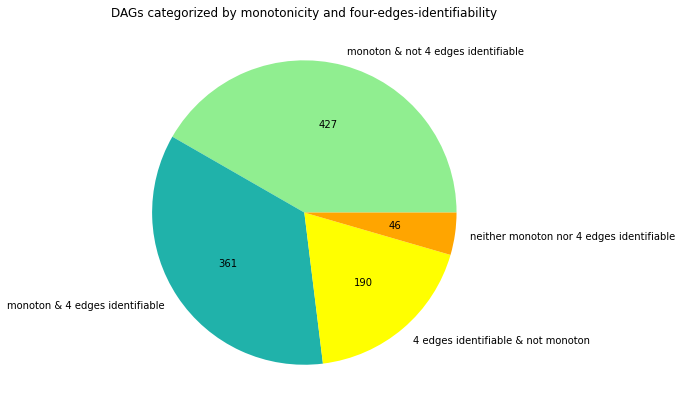

In [16]:
fig4 = plt.figure(figsize=(7, 7))
ax4 = fig4.add_subplot()

labels = 'monoton & not 4 edges identifiable', 'monoton & 4 edges identifiable', '4 edges identifiable & not monoton', 'neither monoton nor 4 edges identifiable'
sizes = [only_monton, monoton_and_alledges, four_edges_not_monoton, not_monon_not_fouredges]
# print(f'{only_monton + monoton_and_alledges + four_edges_not_monoton + not_monon_not_fouredges = }')

ax4.pie(sizes, labels=labels, colors=[ 'lightgreen', 'lightseagreen', 'yellow', 'orange'], autopct= lambda x: round(x*1024/100))
ax4.set_title('DAGs categorized by monotonicity and four-edges-identifiability')
plt.show()

### Deleting of which confounder edges leads to non-identification of edge for DAGs for which all edges are identifiable? 

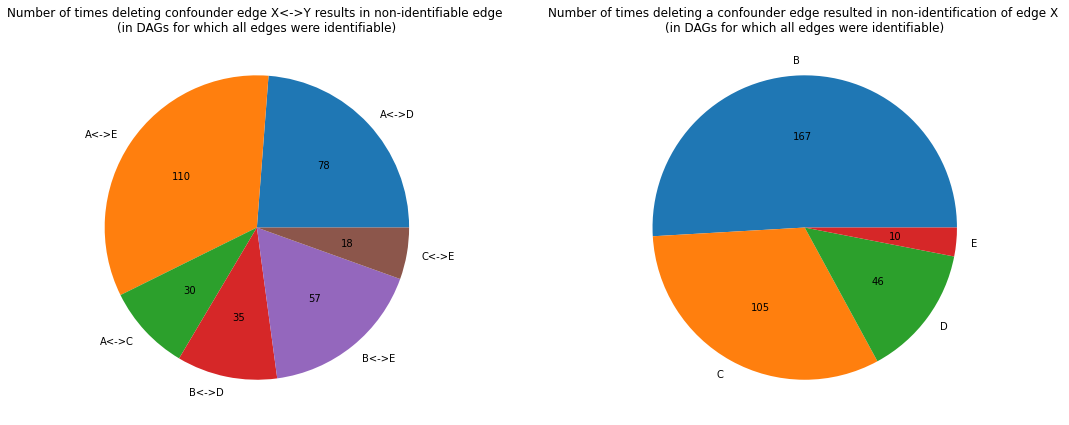

In [17]:
# get the confouder edges that lead to non-monotonicity and the corresponding edge that fails to be identified after removing the confounder: 
missing_edges_and_conseq = []
record = []
edges_list = ['A', 'B', 'C', 'D', 'E']
for i in range(len(nodes_diff_all)): 
    DAG = monoton_dags[i][0]
    DAGsplt = DAG.split(' ')
    missing_edges_and_conseq_local = []
    record_local = []
    for j in range(len(nodes_diff_all[i])): 
        subdag = monoton_dags[i][j+1]
        subdagsplt = subdag.split(' ')
        difference = [ x for x in DAGsplt if x not in subdagsplt]
        missing_edges_and_conseq_local_local = []
        record_local_local = []
        # just check for DAGs for which all 4 edges are identifiable, but which are not monoton: 
        if i in dags_4_notmonon_indx: 
            for k in range(len(nodes_diff_all[i][j])): 
                if nodes_diff_all[i][j][k] == -1.0: 
                    missing_edges_and_conseq_local_local.append([difference, edges_list[k]])
                    record_local_local.append([i, j+1, k])
        missing_edges_and_conseq_local.append(missing_edges_and_conseq_local_local)
        record_local.append(record_local_local)
    missing_edges_and_conseq.append(missing_edges_and_conseq_local)
    record.append(record_local)



# print(f'{len(missing_edges_and_conseq), missing_edges_and_conseq = }')

flat_missing_edges_and_conseq = [ x for sublist in missing_edges_and_conseq for subsublist in sublist for x in subsublist ] 
# print(f'{len(flat_missing_edges_and_conseq), flat_missing_edges_and_conseq = }')

# get all the confouder edges: 
nonmon_maker_edges = [ x[0][0] for x in flat_missing_edges_and_conseq ]
# print(f'{len(nonmon_maker_edges), nonmon_maker_edges = }')
counts_nonmon_maker = Counter(nonmon_maker_edges)
# print(f'{len(counts_nonmon_maker), counts_nonmon_maker = }')

# get all the non-identifiable edges: 
missing_edges = [ x[1] for x in flat_missing_edges_and_conseq ]
# print(f'{len(missing_edges), missing_edges = }')
counts_edges = Counter(missing_edges)
# print(f'{counts_edges = }')

# Plot edges that lead to non-monotonicity & the edges that were failed to identifiy: 
fig5 = plt.figure(figsize=(18, 7))
ax5 = fig5.add_subplot(1,2,1)

labels = []
sizes = []
for x, y in counts_nonmon_maker.items():
    labels.append(x)
    sizes.append(y)

ax5.pie(sizes, labels=labels,  autopct= lambda x: round(x*(len(nonmon_maker_edges))/100))
ax5.set_title('Number of times deleting confounder edge X<->Y results in non-identifiable edge \n(in DAGs for which all edges were identifiable)')

ax6 = fig5.add_subplot(1,2,2)

labels = []
sizes = []
for x, y in counts_edges.items():
    labels.append(x)
    sizes.append(y)

ax6.pie(sizes, labels=labels,  autopct= lambda x: round(x*(len(missing_edges))/100))
ax6.set_title('Number of times deleting a confounder edge resulted in non-identification of edge X \n(in DAGs for which all edges were identifiable)')
plt.show()



#### check above data: 

In [18]:
# print(f'{len(record), record = }')

record_sqe = [x for lst in record for sublist in lst for x in sublist ]
# print(f'{len(record_sqe), record_sqe = }')

choose = np.random.choice(range(len(record_sqe)))
test = record_sqe[choose]
print(f'{test = }')

# print(f'{missing_edges_and_conseq[test[0]] = }')
print(f'{missing_edges_and_conseq[test[0]][test[1]-1] = }')

print(f'\n{monoton_dags[test[0]][0] = }')
print(f'{monoton_data[test[0]][0] = } \n')

print(f'{monoton_dags[test[0]][test[1]] = } ')
print(f'{monoton_data[test[0]][test[1]] = } \n') 

## NOTICE in Output that the order of DAG NOTATION seems to be differentn in 'monoton_dags' for the subdags, than in 'dags' therefor: # <--- ! dependent on NOTATION of DAGs !


test = [246, 5, 2]
missing_edges_and_conseq[test[0]][test[1]-1] = [[['B<->E'], 'C'], [['B<->E'], 'D']]

monoton_dags[test[0]][0] = 'dag { A->B->C->D->E C<->D B<->E B<->D B<->C A<->D A<->C }'
monoton_data[test[0]][0] = '{"results":{"B":[{"fastp":[[[[1,2,1]],null,[[1,1,1]],null,null]],"instrument":"A"}],"C":[{"fastp":[[[[-1,4,1,12,1],[1,5,1,11,1]],null,[[-1,4,1,9,1],[1,5,1,8,1]],null,null]],"propagate":"E","propagatePath":["E"],"propagatedMissingCycles":[],"oldMissingCycles":[]}],"D":[{"fastp":[[[[-1,4,1,14,1],[1,5,1,13,1]],null,[[-1,4,1,12,1],[1,5,1,11,1]],null,null]],"propagate":"E","propagatePath":["E"],"propagatedMissingCycles":[],"oldMissingCycles":[]}],"E":[{"fastp":[[[[1,5,1]],null,[[1,4,1]],null,null]],"instrument":"A"}]}}' 

monoton_dags[test[0]][test[1]] = 'dag { A->B->C->D->E A<->C A<->D B<->C B<->D C<->D }' 
monoton_data[test[0]][test[1]] = '{"results":{"B":[{"fastp":[[[[1,2,1]],null,[[1,1,1]],null,null]],"instrument":"A"}],"E":[{"fastp":[[[[1,5,1]],null,[[1,4,1]],null,null]]

### Deleting of which confounder edges leads to non-monotonicity of DAGs for which all edges are identifiable? 

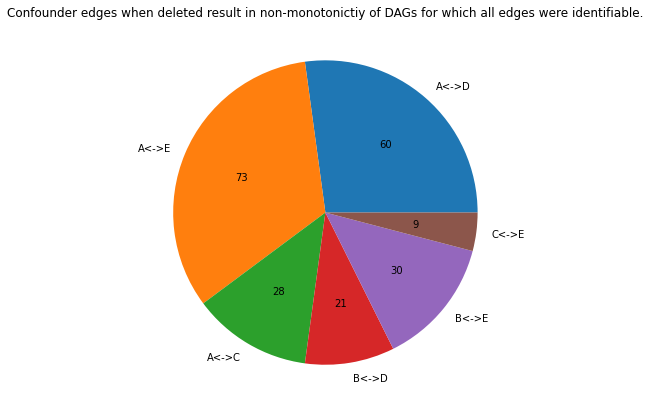

In [19]:
# get the confouder edges that lead to non-monotonicity after removing the confounder: 
# just check for DAGs for which all 4 edges are identifiable, but which are not monoton: 
nonmon_confouders = []
for i in dags_4_notmonon_indx: 
    DAG = monoton_dags[i][0]
    DAGsplt = DAG.split(' ')
    nonmon_confouders_local = []
    for j in range(len(nodes_diff_all[i])): 
        subdag = monoton_dags[i][j+1]
        subdagsplt = subdag.split(' ')
        difference = [ x for x in DAGsplt if x not in subdagsplt]
        for k in range(len(nodes_diff_all[i][j])): 
            if nodes_diff_all[i][j][k] == -1.0: 
                nonmon_confouders_local.append(difference)
                break
        
    nonmon_confouders.append(nonmon_confouders_local)
    
# print(f'{len(nonmon_confouders), nonmon_confouders = }')

flat_nonmon_confouders = [ x for sublist in nonmon_confouders for subsublist in sublist for x in subsublist ] 
# print(f'{len(flat_nonmon_confouders), flat_nonmon_confouders = }')


counts = Counter(flat_nonmon_confouders)
# print(counts)


# Plot: 
fig7 = plt.figure(figsize=(7, 7))
ax7 = fig7.add_subplot()

labels = []
sizes = []
for x, y in counts.items():
    labels.append(x)
    sizes.append(y)

ax7.pie(sizes, labels=labels,  autopct= lambda x: round(x*(len(flat_nonmon_confouders))/100))
ax7.set_title('Confounder edges when deleted result in non-monotonictiy of DAGs for which all edges were identifiable.')
plt.show()


### In which DAGs there was more than one way to identify an edge? 

In [20]:
jlizt = []
for date in data: 
    jdate = json.loads(date)
    jlx = []
    for key in jdate['results']: 
        jlx.append(jdate['results'][key][0]['fastp'])
    jlizt.append(jlx)


jmount_lzt = [[len(x) for x in y] for y in jlizt]
print(f'{len(jmount_lzt), jmount_lzt = }')

len(jmount_lzt), jmount_lzt = (1024, [[1, 1, 1, 1], [1, 1, 1], [1, 1, 1, 1], [1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [2, 2, 2, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [2, 2, 2, 2], [1, 1, 1, 1], [1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1], [1, 1, 1, 1], [1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1], [1, 1, 1, 1], [1, 1, 1], [1, 1, 1, 1], [1, 1, 1], [1, 1], [1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [2, 2, 2, 2], [1, 1, 1, 1], [1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1], [

### sanity checks / check that datasets are as expected:

In [21]:
print(f'{len(dags) = }')
print(f'{len(monoton_dags) = }')

eq_dags_Q = np.zeros(len(dags))
for i, dag in enumerate(dags): 
    eq_dags_Q[i] = np.all(dag == monoton_dags[i][0])
    
print(f'Check if dags and monoton_dags have the same order: {len(eq_dags_Q) == np.sum(eq_dags_Q) = }')

# same for data and monon_data: 

print(f'{len(data) = }')
print(f'{len(monoton_data) = }')

eq_data_Q = np.zeros(len(data))
for i, dat in enumerate(data): 
    eq_data_Q[i] = np.all(dat == monoton_data[i][0])
    
print(f'Check if data and monoton_data have the same order: {len(eq_data_Q) == np.sum(eq_data_Q) = }')

len(dags) = 1024
len(monoton_dags) = 1024
Check if dags and monoton_dags have the same order: len(eq_dags_Q) == np.sum(eq_dags_Q) = True
len(data) = 1024
len(monoton_data) = 1024
Check if data and monoton_data have the same order: len(eq_data_Q) == np.sum(eq_data_Q) = True
